In [4]:
import pandas as pd
import numpy as np


In [5]:
df =pd.read_csv("car_fuel_efficiency.csv")

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

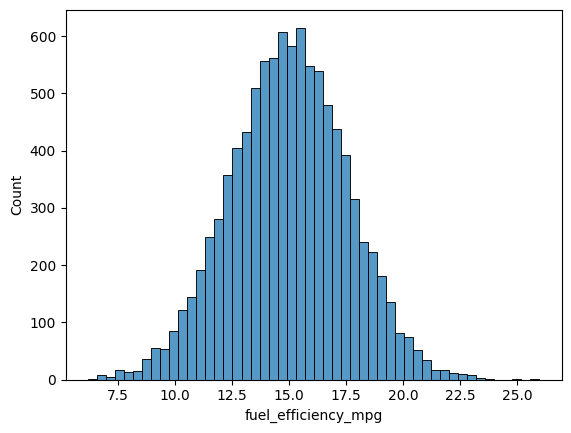

In [7]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

### Missing values

In [8]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

What's the median (50% percentile) for variable 'horsepower'?

In [10]:
df['horsepower'].median()

np.float64(149.0)

### Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use the same code as in the lectures

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [20]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n

9704

In [14]:
n_val, n_test, n_train


(1940, 1940, 5824)

In [15]:
df.iloc[[10, 0, 3, 5]]


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
10,230,5.0,100.0,3111.810181,15.4,2014,Europe,Diesel,All-wheel drive,0.0,13.386605
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818


In [16]:
# Shuffle data
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)
car_fuel_efficiency_shuffled = df.iloc[idx] 

In [17]:
car_fuel_efficiency_shuffled.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [36]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight',
        'model_year']
# Split data
X_train = car_fuel_efficiency_shuffled[base].iloc[:n_train].copy()
X_val = car_fuel_efficiency_shuffled[base].iloc[n_train:n_train + n_val].copy()
X_test = car_fuel_efficiency_shuffled[base].iloc[n_train+n_val:].copy()

In [37]:
# Split data
Y_train = car_fuel_efficiency_shuffled['fuel_efficiency_mpg'].iloc[:n_train].copy()
Y_val = car_fuel_efficiency_shuffled['fuel_efficiency_mpg'].iloc[n_train:n_train + n_val].copy()
Y_test = car_fuel_efficiency_shuffled['fuel_efficiency_mpg'].iloc[n_train+n_val:].copy()

In [38]:
# filling missing values with zeros and mean
def handle_nan(df, feature, fillnan_with):
    df_copy = df.copy()
    if fillnan_with == 'mean':
        df_copy[feature].fillna(value = df_copy[feature].mean(), inplace=True)
    elif fillnan_with == 'zero':
        df_copy[feature].fillna(value = 0, inplace=True)
        
    return df_copy.values

# Root mean squared error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    rmse = np.sqrt(mse)
    return rmse

In [39]:
#horsepower


In [40]:
def linear_regression(X, y):
    # adding ones in the dataset X
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])

    XTX = X.T.dot(X)
    XTX_inverse = np.linalg.inv(XTX)
    w = XTX_inverse.dot(X.T).dot(y)

    Y_pred = X.dot(w)
    return Y_pred

In [41]:
X_train_zeros = handle_nan(X_train, 'horsepower', 'zero')
X_val_zeros = handle_nan(X_val, 'horsepower', 'zero')

X_train_mean = handle_nan(X_train, 'horsepower', 'mean')
X_val_mean = handle_nan(X_val, 'horsepower', 'mean')

/tmp/ipykernel_5308/3739699691.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feature].fillna(value = 0, inplace=True)
/tmp/ipykernel_5308/3739699691.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [45]:
# For training set
Y_pred = linear_regression(X_train_zeros, Y_train)
rmse_train_zeros = rmse(Y_train, Y_pred)
print('RMSE for train set with zeros: ',round(rmse_train_zeros, 2) )

RMSE for train set with zeros:  0.52


In [46]:
Y_pred = linear_regression(X_train_mean, Y_train)
rmse_train_mean= rmse(Y_train, Y_pred)
print('RMSE for train set with mean: ',round(rmse_train_mean, 2) )

RMSE for train set with mean:  0.46


In [49]:
print('\n')
# For validation set
Y_pred = linear_regression(X_val_zeros, Y_val)
rmse_val_zeros = rmse(Y_val, Y_pred)
print('RMSE for validation set with zeros: ', round(rmse_val_zeros, 2) )

Y_pred = linear_regression(X_val_mean, Y_val)
rmse_val_mean = rmse(Y_val, Y_pred)
print('RMSE for validation set with mean: ',round(rmse_val_mean, 2) )



RMSE for validation set with zeros:  0.52
RMSE for validation set with mean:  0.46


In [51]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    Y_pred = X.dot(w_full)
    return Y_pred, w_full

In [55]:
# filling missing values with zeros
X_train = X_train_zeros
X_val =X_val_zeros

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    Y_pred, _ = train_linear_regression_reg(X_val, Y_val, r=r)
    rmse_val = round( rmse(Y_val, Y_pred), 5)
    print('%06s %0.5f' % (r, rmse_val))

     0 0.51671
  0.01 0.51731
   0.1 0.52074
     1 0.52240
     5 0.52260
    10 0.52262
   100 0.52264


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

In [82]:
def split_data(df, target_column, train_size = 0.6, 
               val_size = 0.2, seed = 42):
    
    if train_size + val_size >= 1.0:
        raise ValueError("Value larger then 1")
    
    n = len(df)
    n_train = int(train_size*n)
    n_val = int(val_size*n)
    
    # Shuffle data
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    # Split data
    X_train = df_shuffled.iloc[:n_train].copy()
    X_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    X_test = df_shuffled.iloc[n_train + n_val:].copy()

    # Fill missing values with zeros
    X_train = handle_nan(X_train, 'horsepower', 'zero')
    X_val = handle_nan(X_val, 'horsepower', 'zero')
    X_test = handle_nan(X_test, 'horsepower', 'zero')

    Y_train = car_fuel_efficiency_shuffled['fuel_efficiency_mpg'].iloc[:n_train].copy()
    Y_val = car_fuel_efficiency_shuffled['fuel_efficiency_mpg'].iloc[n_train:n_train + n_val].copy()
    Y_test = car_fuel_efficiency_shuffled['fuel_efficiency_mpg'].iloc[n_train+n_val:].copy()

    X = {'train':X_train, 'val':X_val, 'test':X_test}
    Y = {'train': Y_train,'val':Y_val,'test': Y_test}

    return X,Y

In [86]:
display(df.head(2))
base = ['engine_displacement', 'horsepower', 'vehicle_weight',
        'model_year']
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

errors = []
for seed in seeds:
    X,Y = split_data(df = df[base], target_column= '', seed = seed)
    Y_pred = linear_regression(X['val'], Y['val'])
    error = rmse(Y['val'], Y_pred)

    print('%10s' %seed, round( error, 3) )
    errors.append( error )   

print('Std =', round(np.std(errors), 3))

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217


         0 2.65
         1 2.651
         2 2.651
         3 2.645
         4 2.651
         5 2.652
         6 2.645
         7 2.651
         8 2.646
         9 2.652
Std = 0.003


/tmp/ipykernel_5308/3739699691.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feature].fillna(value = 0, inplace=True)
/tmp/ipykernel_5308/3739699691.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5


In [93]:
# Split data and fill missing values with zeros
X,Y = split_data(df = df[base], target_column= '', seed = 9)

# Combine train and validation
X_train = np.concatenate([ X['train'], X['val']])
Y_train = np.concatenate([ Y['train'], Y['val']])

# Train model on train and validation and use in test set
Y_pred, _ = train_linear_regression_reg(X_train, Y_train, r=0.001)
rmse_val = round( rmse(Y_val, Y_pred), 5)
error = rmse(Y['test'], Y_pred)
print('RMSE on test set = ',rmse_val)

RMSE on test set =  2.68071


/tmp/ipykernel_5308/3739699691.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[feature].fillna(value = 0, inplace=True)


In [75]:
def train_linear_regression_reg_1(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [73]:
w0, w = train_linear_regression_reg_1(X_train, Y_train, r=0.001)


ValueError: shapes (5,7762) and (13584,) not aligned: 7762 (dim 1) != 13584 (dim 0)

In [76]:
def ridge_regression(X, y, r = 0.0):
    # adding ones in the dataset X
    X_0 = np.ones(X.shape[0])
    X = np.column_stack([X_0, X])

    XTX = X.T.dot(X)
    # add regularization term rI
    I = np.eye(XTX.shape[0])
    XTX_inverse = np.linalg.inv(XTX + r*I)
    w = XTX_inverse.dot(X.T).dot(y)

    Y_pred = X.dot(w)
    return Y_pred, w